# <p style="text-align: center;">subert Williams's Attempt at Clustering-Datasets, Clustering and Classification with the Banknote Dataset</p>

## Importing the neccesary libraries.
We will use pandas for its DataFrame class. Although we didn't use numpy here, it's still a good idea to keep it imported for future use. We also imported Scikit-learn for it's powerful models, skipping the boilerplate stuff and just making the the code simpler and interpretable. Matplotlib and Seaborn for visual analysis, plt to compare the accuracy scores and sns for it's correlation matrix + heatmap combo.

In [318]:
import pandas as pd
import numpy as np
import sklearn as skl
import matplotlib.pyplot as plt
import seaborn as sns

## Importing the dataset.
We import the dataset using pandas read_csv function from the repository.

In [319]:
path = r"..\01. UCI\banknote.csv"
df = pd.read_csv(path, header=0)

df.head(10)

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.80730,-0.44699,0
1,4.54590,8.1674,-2.45860,-1.46210,0
2,3.86600,-2.6383,1.92420,0.10645,0
3,3.45660,9.5228,-4.01120,-3.59440,0
4,0.32924,-4.4552,4.57180,-0.98880,0
5,4.36840,9.6718,-3.96060,-3.16250,0
6,3.59120,3.0129,0.72888,0.56421,0
7,2.09220,-6.8100,8.46360,-0.60216,0
8,3.20320,5.7588,-0.75345,-0.61251,0
9,1.53560,9.1772,-2.27180,-0.73535,0


## Analyze the correlation matrix.
This does look like there are some colinearity...

<Axes: >

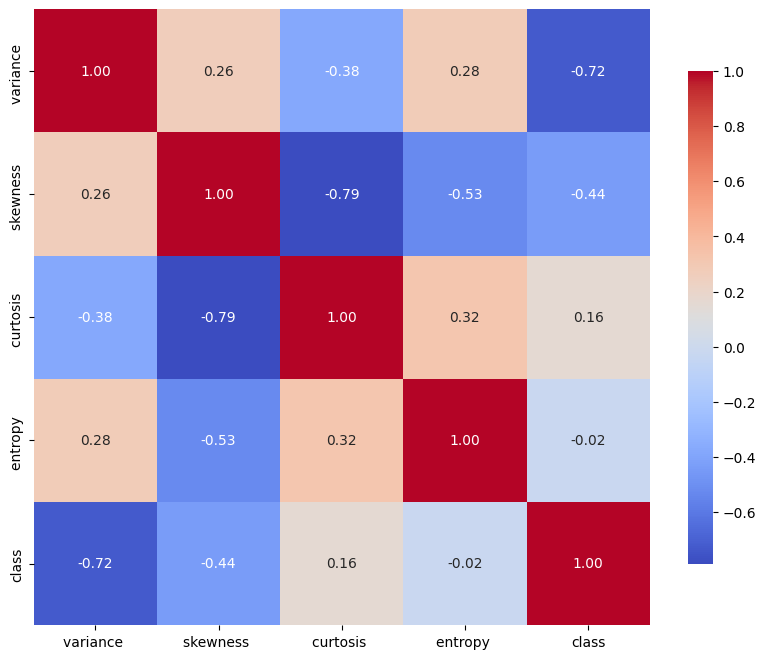

In [320]:
corr_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True, cbar_kws={"shrink": .8})

## Split the dataframe into X and y.
This is for the skl.preprocessing.train_test_split function, which requires 2 arguments to be passed in.

In [321]:
X, y = df.iloc[:, :-1], df.iloc[:, -1]
X.head()

,variance,skewness,curtosis,entropy
0,3.62160,8.6661,-2.8073,-0.44699
1,4.54590,8.1674,-2.4586,-1.46210
2,3.86600,-2.6383,1.9242,0.10645
3,3.45660,9.5228,-4.0112,-3.59440
4,0.32924,-4.4552,4.5718,-0.98880


## Treating this like a dataset meant for classification.
As a base case I will use decision trees and random forests, this will give me a sense of how the banknotes are supposed to be perceived.

In [322]:
leaves = 2  # You can change this value to test different numbers of leaf nodes
model_1 = skl.tree.DecisionTreeClassifier(max_leaf_nodes=leaves)

def preprocess(X, y, random_num=42):
    X_temp, X_test, y_temp, y_test = skl.model_selection.train_test_split(X, y, test_size=0.2, random_state=random_num)
    X_train, X_val, y_train, y_val = skl.model_selection.train_test_split(X_temp, y_temp, test_size=0.25, random_state=random_num)
    return X_train, X_val, X_test, y_train, y_val, y_test

X_train, X_val, X_test, y_train, y_val, y_test = preprocess(X, y)

model_comparison_tree = pd.DataFrame(columns=["Leaves", "Validation F1 Score", "Validation Accuracy", "Test F1 Score", "Test Accuracy"])

def try_model_tree(model, X_train, y_train, X_val, y_val, X_test, y_test, df):
    model.fit(X_train, y_train)
    val_f1 = skl.metrics.f1_score(y_val, model.predict(X_val), average="macro")
    val_acc = skl.metrics.accuracy_score(y_val, model.predict(X_val))
    test_f1 = skl.metrics.f1_score(y_test, model.predict(X_test), average="macro")
    test_acc = skl.metrics.accuracy_score(y_test, model.predict(X_test))
    df.loc[len(df)] = [leaves, val_f1, val_acc, test_f1, test_acc]
try_model_tree(model_1, X_train, y_train, X_val, y_val, X_test, y_test, model_comparison_tree)

leaf_list = np.arange(5, 51, 5)
for leaves in leaf_list:
    model_1 = skl.tree.DecisionTreeClassifier(max_leaf_nodes=leaves)
    try_model_tree(model_1, X_train, y_train, X_val, y_val, X_test, y_test, model_comparison_tree)

model_comparison_tree.head(20)
    

,Leaves,Validation F1 Score,Validation Accuracy,Test F1 Score,Test Accuracy
0,2.0,0.831746,0.832727,0.810002,0.810909
1,5.0,0.921986,0.923636,0.915356,0.916364
2,10.0,0.929704,0.930909,0.952423,0.952727
3,15.0,0.966331,0.967273,0.974279,0.974545
4,20.0,0.959045,0.960000,0.978000,0.978182
5,25.0,0.970180,0.970909,0.985333,0.985455
6,30.0,0.962725,0.963636,0.981654,0.981818
7,35.0,0.958949,0.960000,0.974316,0.974545
8,40.0,0.962725,0.963636,0.981654,0.981818
9,45.0,0.955372,0.956364,0.978000,0.978182


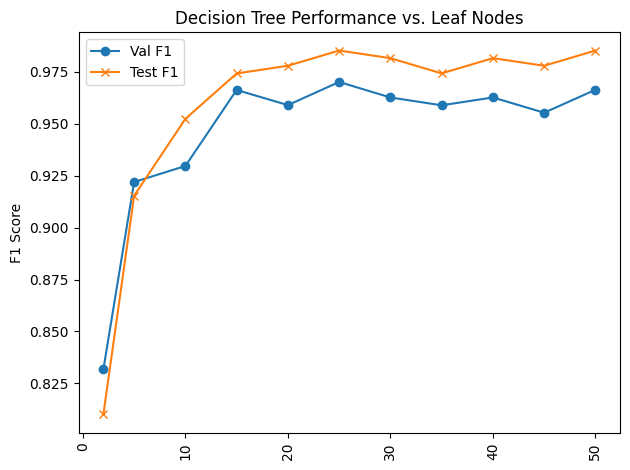

Leaves                 25.000000
Validation F1 Score     0.970180
Validation Accuracy     0.970909
Test F1 Score           0.985333
Test Accuracy           0.985455
Name: 5, dtype: float64


In [323]:
plt.plot(model_comparison_tree["Leaves"], model_comparison_tree["Validation F1 Score"], label="Val F1", marker='o')
plt.plot(model_comparison_tree["Leaves"], model_comparison_tree["Test F1 Score"], label="Test F1", marker='x')
plt.xticks(rotation=90)
plt.ylabel("F1 Score")
plt.title("Decision Tree Performance vs. Leaf Nodes")
plt.legend()
plt.tight_layout()
plt.show()
best_row = model_comparison_tree.loc[model_comparison_tree["Validation F1 Score"].idxmax()]
print(best_row)


In [324]:
X.head()

,variance,skewness,curtosis,entropy
0,3.62160,8.6661,-2.8073,-0.44699
1,4.54590,8.1674,-2.4586,-1.46210
2,3.86600,-2.6383,1.9242,0.10645
3,3.45660,9.5228,-4.0112,-3.59440
4,0.32924,-4.4552,4.5718,-0.98880


## Something seems suspicious...
I am suspicious that the "curtosis" and "skewness" columns are highly correlated, so I will create a new DataFrame with these two columns to analyze them further.

<Axes: xlabel='curtosis ', ylabel='skewness '>

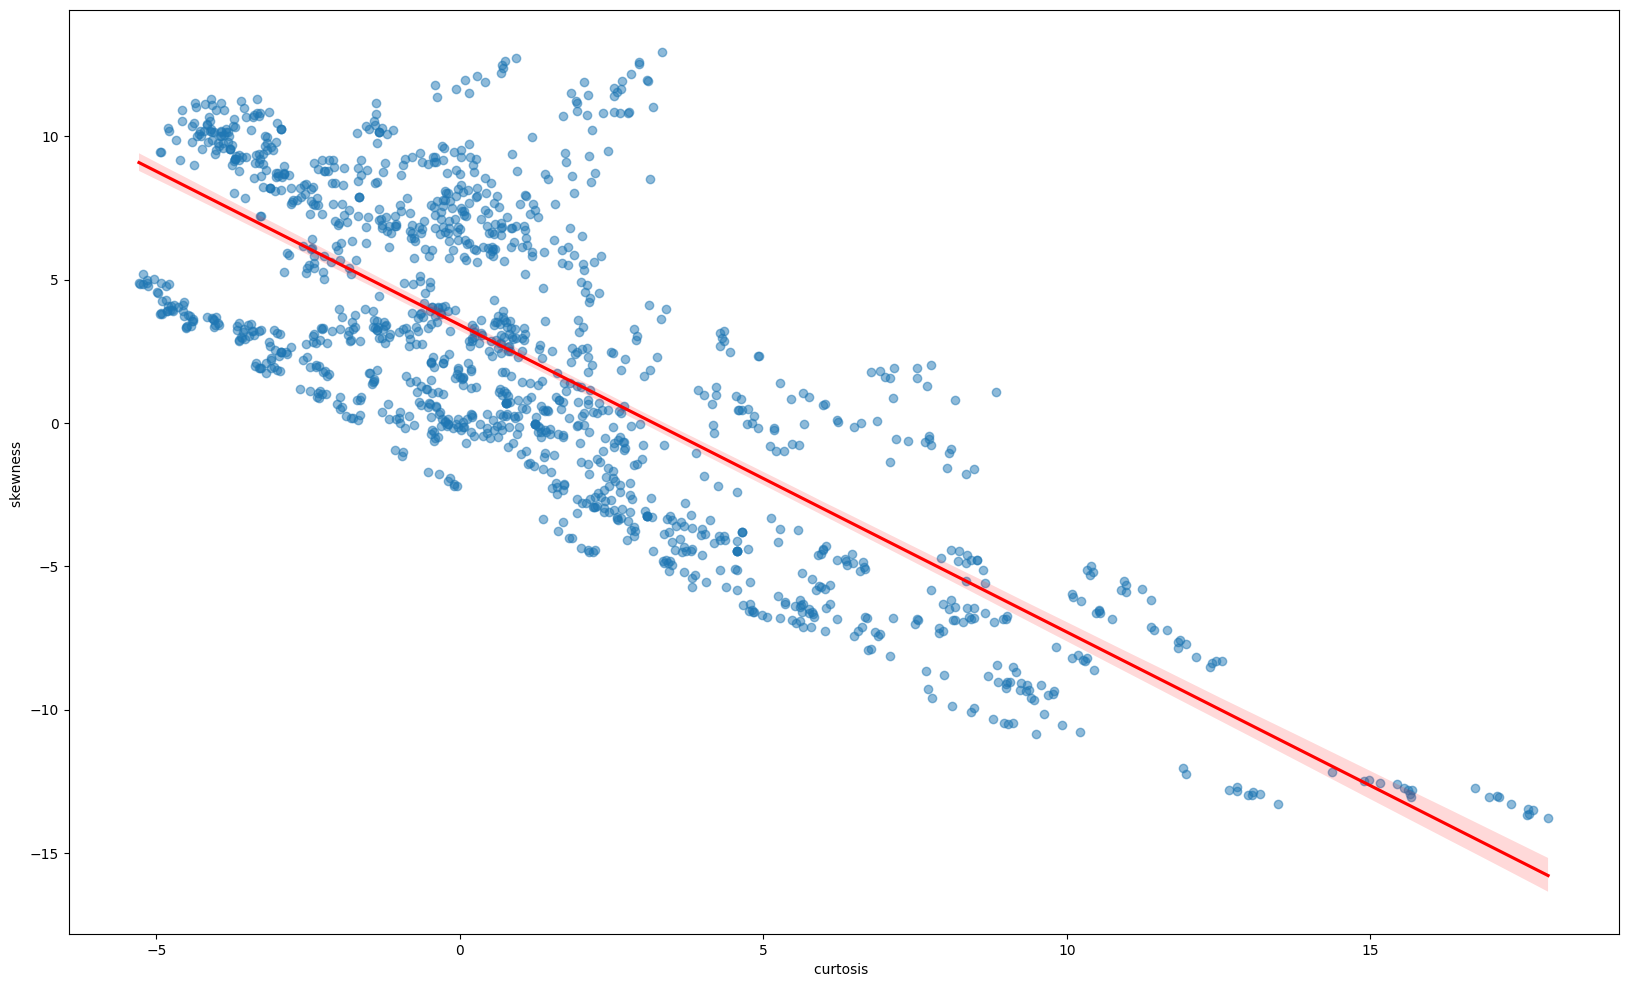

In [325]:
X_suspicious = X.iloc[:, 2]
y_suspicious = X.iloc[:, 1]

plt.figure(figsize=(20, 12))
sns.regplot(x=X_suspicious, y=y_suspicious, line_kws={"color": "red"}, scatter_kws={"alpha": 0.5})

# Drop the skewness and curtosis.
But wait, we don't just drop both the columns and call it a day! We will inspect the best way to still keep these 2 features in while also not having any colinearity. We will test various methods of combining the 2 columns and scoring them using random forests.

In [326]:
df.columns = df.columns.str.strip() # APPARENTLY there are some leading/trailing spaces in the column names... thats so pmo ngl...

df["skew_curt_sum"] = df["skewness"] + df["curtosis"]
df["skew_curt_diff"] = df["skewness"] - df["curtosis"]
df["skew_curt_ratio"] = df["skewness"] / (df["curtosis"] + 1e-6)
df.drop(columns=["skewness", "curtosis"], inplace=True)

df.head()

,variance,entropy,class,skew_curt_sum,skew_curt_diff,skew_curt_ratio
0,3.62160,-0.44699,0,5.8588,11.4734,-3.086989
1,4.54590,-1.46210,0,5.7088,10.6260,-3.321973
2,3.86600,0.10645,0,-0.7141,-4.5625,-1.371115
3,3.45660,-3.59440,0,5.5116,13.5340,-2.374053
4,0.32924,-0.98880,0,0.1166,-9.0270,-0.974496


In [327]:
df_1 = df.copy()
df_1.drop(columns=["skew_curt_diff", "skew_curt_ratio"], inplace=True)

df_2 = df.copy()
df_2.drop(columns=["skew_curt_sum", "skew_curt_ratio"], inplace=True)

df_3 = df.copy()
df_3.drop(columns=["skew_curt_diff", "skew_curt_sum"], inplace=True)

In [328]:
dfs = [df_1, df_2, df_3]
dfs_title = ["skew_curt_sum", "skew_curt_diff", "skew_curt_ratio"]

df_1.head(), df_2.head(), df_3.head()

(   variance  entropy  class  skew_curt_sum
 0   3.62160 -0.44699      0         5.8588
 1   4.54590 -1.46210      0         5.7088
 2   3.86600  0.10645      0        -0.7141
 3   3.45660 -3.59440      0         5.5116
 4   0.32924 -0.98880      0         0.1166,
    variance  entropy  class  skew_curt_diff
 0   3.62160 -0.44699      0         11.4734
 1   4.54590 -1.46210      0         10.6260
 2   3.86600  0.10645      0         -4.5625
 3   3.45660 -3.59440      0         13.5340
 4   0.32924 -0.98880      0         -9.0270,
    variance  entropy  class  skew_curt_ratio
 0   3.62160 -0.44699      0        -3.086989
 1   4.54590 -1.46210      0        -3.321973
 2   3.86600  0.10645      0        -1.371115
 3   3.45660 -3.59440      0        -2.374053
 4   0.32924 -0.98880      0        -0.974496)

In [329]:
n_estimators = np.arange(20, 201, 20)
forest_comparators = pd.DataFrame(columns=["df_number", "n_estimators", "Validation F1 Score", "Validation Accuracy", "Test F1 Score", "Test Accuracy"])

def try_model_forest(model, X_train, y_train, X_val, y_val, X_test, y_test, df, n_estimators, df_number):
    model.fit(X_train, y_train)
    val_f1 = skl.metrics.f1_score(y_val, model.predict(X_val), average="macro")
    val_acc = skl.metrics.accuracy_score(y_val, model.predict(X_val))
    test_f1 = skl.metrics.f1_score(y_test, model.predict(X_test), average="macro")
    test_acc = skl.metrics.accuracy_score(y_test, model.predict(X_test))
    df.loc[len(df)] = [df_number, n_estimators, val_f1, val_acc, test_f1, test_acc]

count = 0

for df in dfs:
    X, y = df.iloc[:, [0, 1, 3]], df.iloc[:, 2]
    X_train, X_val, X_test, y_train, y_val, y_test = preprocess(X, y, random_num=42)
    for estimators in n_estimators:
        model = skl.ensemble.RandomForestClassifier(n_estimators=estimators, max_depth=4)
        try_model_forest(model, X_train, y_train, X_val, y_val, X_test, y_test, forest_comparators, estimators, dfs_title[count])

    count += 1

forest_comparators.head(35)


,df_number,n_estimators,Validation F1 Score,Validation Accuracy,Test F1 Score,Test Accuracy
0,skew_curt_sum,20,0.985090,0.985455,0.985369,0.985455
1,skew_curt_sum,40,0.985054,0.985455,0.992676,0.992727
2,skew_curt_sum,60,0.985090,0.985455,0.985369,0.985455
3,skew_curt_sum,80,0.985090,0.985455,0.985369,0.985455
4,skew_curt_sum,100,0.985090,0.985455,0.985369,0.985455
5,skew_curt_sum,120,0.973995,0.974545,0.985369,0.985455
6,skew_curt_sum,140,0.985090,0.985455,0.985369,0.985455
7,skew_curt_sum,160,0.985090,0.985455,0.985369,0.985455
8,skew_curt_sum,180,0.985090,0.985455,0.985369,0.985455
9,skew_curt_sum,200,0.985090,0.985455,0.985369,0.985455


In [330]:
forest_comparators.sort_values(by=["Test F1 Score"], ascending=False, inplace=True)
forest_comparators.head(20)

,df_number,n_estimators,Validation F1 Score,Validation Accuracy,Test F1 Score,Test Accuracy
1,skew_curt_sum,40,0.985054,0.985455,0.992676,0.992727
0,skew_curt_sum,20,0.985090,0.985455,0.985369,0.985455
2,skew_curt_sum,60,0.985090,0.985455,0.985369,0.985455
3,skew_curt_sum,80,0.985090,0.985455,0.985369,0.985455
4,skew_curt_sum,100,0.985090,0.985455,0.985369,0.985455
5,skew_curt_sum,120,0.973995,0.974545,0.985369,0.985455
6,skew_curt_sum,140,0.985090,0.985455,0.985369,0.985455
7,skew_curt_sum,160,0.985090,0.985455,0.985369,0.985455
8,skew_curt_sum,180,0.985090,0.985455,0.985369,0.985455
9,skew_curt_sum,200,0.985090,0.985455,0.985369,0.985455


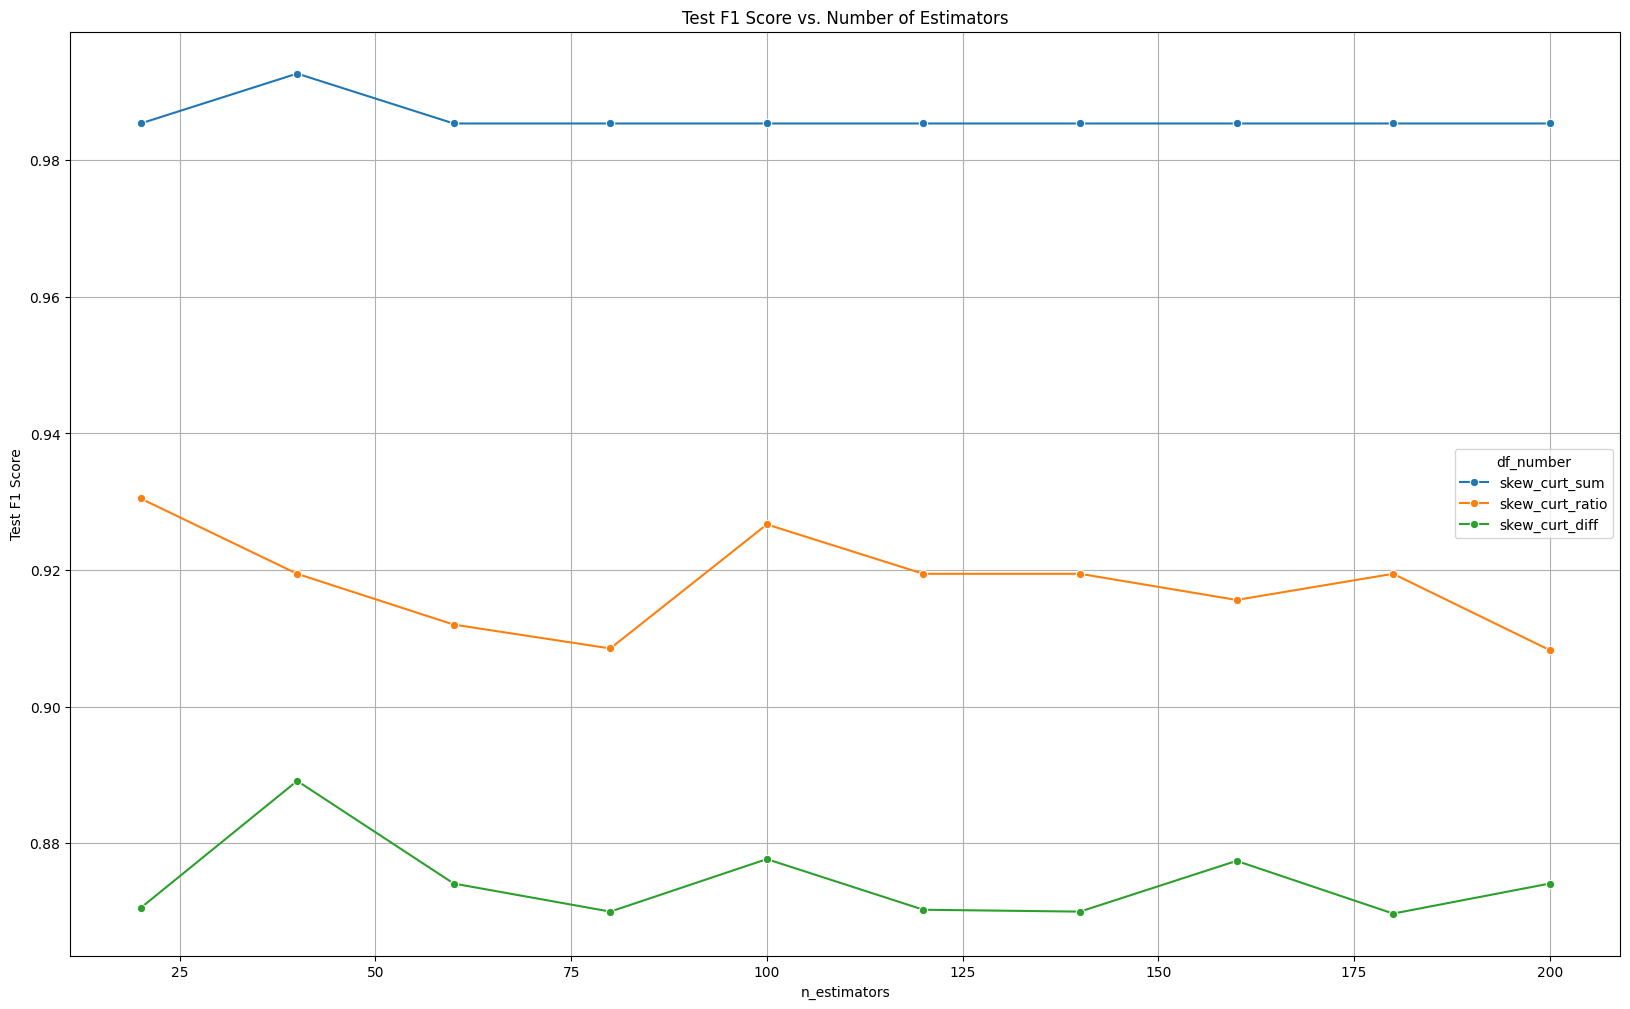

In [331]:
plt.figure(figsize=(20, 12))
sns.lineplot(data=forest_comparators, x="n_estimators", y="Test F1 Score", hue="df_number", marker="o")
plt.title("Test F1 Score vs. Number of Estimators")
plt.ylabel("Test F1 Score")
plt.xlabel("n_estimators")
plt.grid(True)
plt.show()

## Looks like a knockout, we will be keeping the dataframe where it has the column of skew_curt_sum.
We will remove df_2 and df_3 and keeping df_1!

In [332]:
df_1.head()

,variance,entropy,class,skew_curt_sum
0,3.62160,-0.44699,0,5.8588
1,4.54590,-1.46210,0,5.7088
2,3.86600,0.10645,0,-0.7141
3,3.45660,-3.59440,0,5.5116
4,0.32924,-0.98880,0,0.1166


### I am swapping around the columns, dont mind me.

In [333]:
df_copy_copy = df_1.copy()
cols = df_copy_copy.columns.tolist()
i, j = cols.index("class"), cols.index("skew_curt_sum")
cols[i], cols[j] = cols[j], cols[i]
df_copy_copy = df_copy_copy[cols]

df_copy_copy.head()

,variance,entropy,skew_curt_sum,class
0,3.62160,-0.44699,5.8588,0
1,4.54590,-1.46210,5.7088,0
2,3.86600,0.10645,-0.7141,0
3,3.45660,-3.59440,5.5116,0
4,0.32924,-0.98880,0.1166,0


In [334]:
banknote_df = df_copy_copy.copy() # Now this is just ridiculous why did I do this lol

In [335]:
banknote_df.shape

(1372, 4)

## Let's plot the new DataFrame!

Text(0, 0.5, 'Variance')

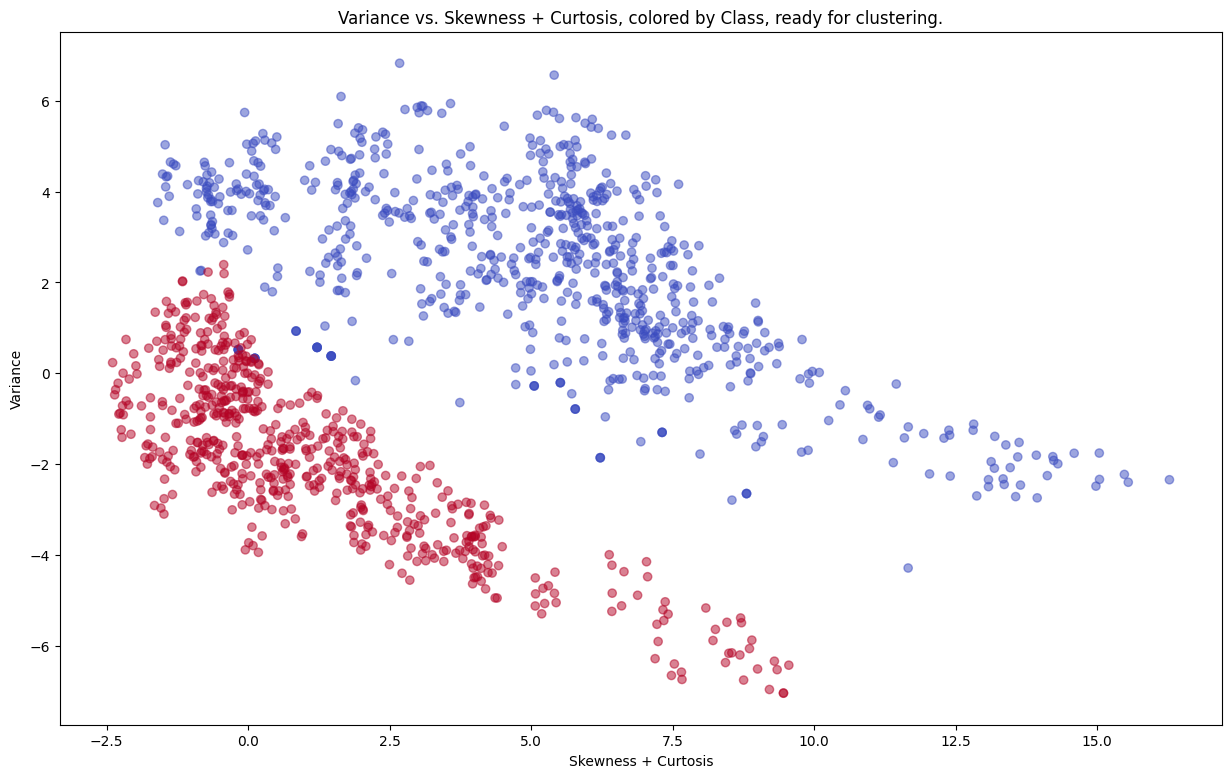

In [336]:
plt.figure(figsize=(15, 9))
plt.scatter(banknote_df["skew_curt_sum"], banknote_df["variance"], alpha=0.5, c=banknote_df["class"], cmap="coolwarm")
plt.title("Variance vs. Skewness + Curtosis, colored by Class, ready for clustering.")
plt.xlabel("Skewness + Curtosis")
plt.ylabel("Variance")

## We are going to try different models for unsupervised learning to cluster the dataset!
I did not use the entropy feature due to it's low correlation with the label, explanation is in the correlation heatmap above. Feature engineering is done, it is time for clustering...

### HDBSCAN
Here we will do a hyperparameter sweep to find which is the best model!

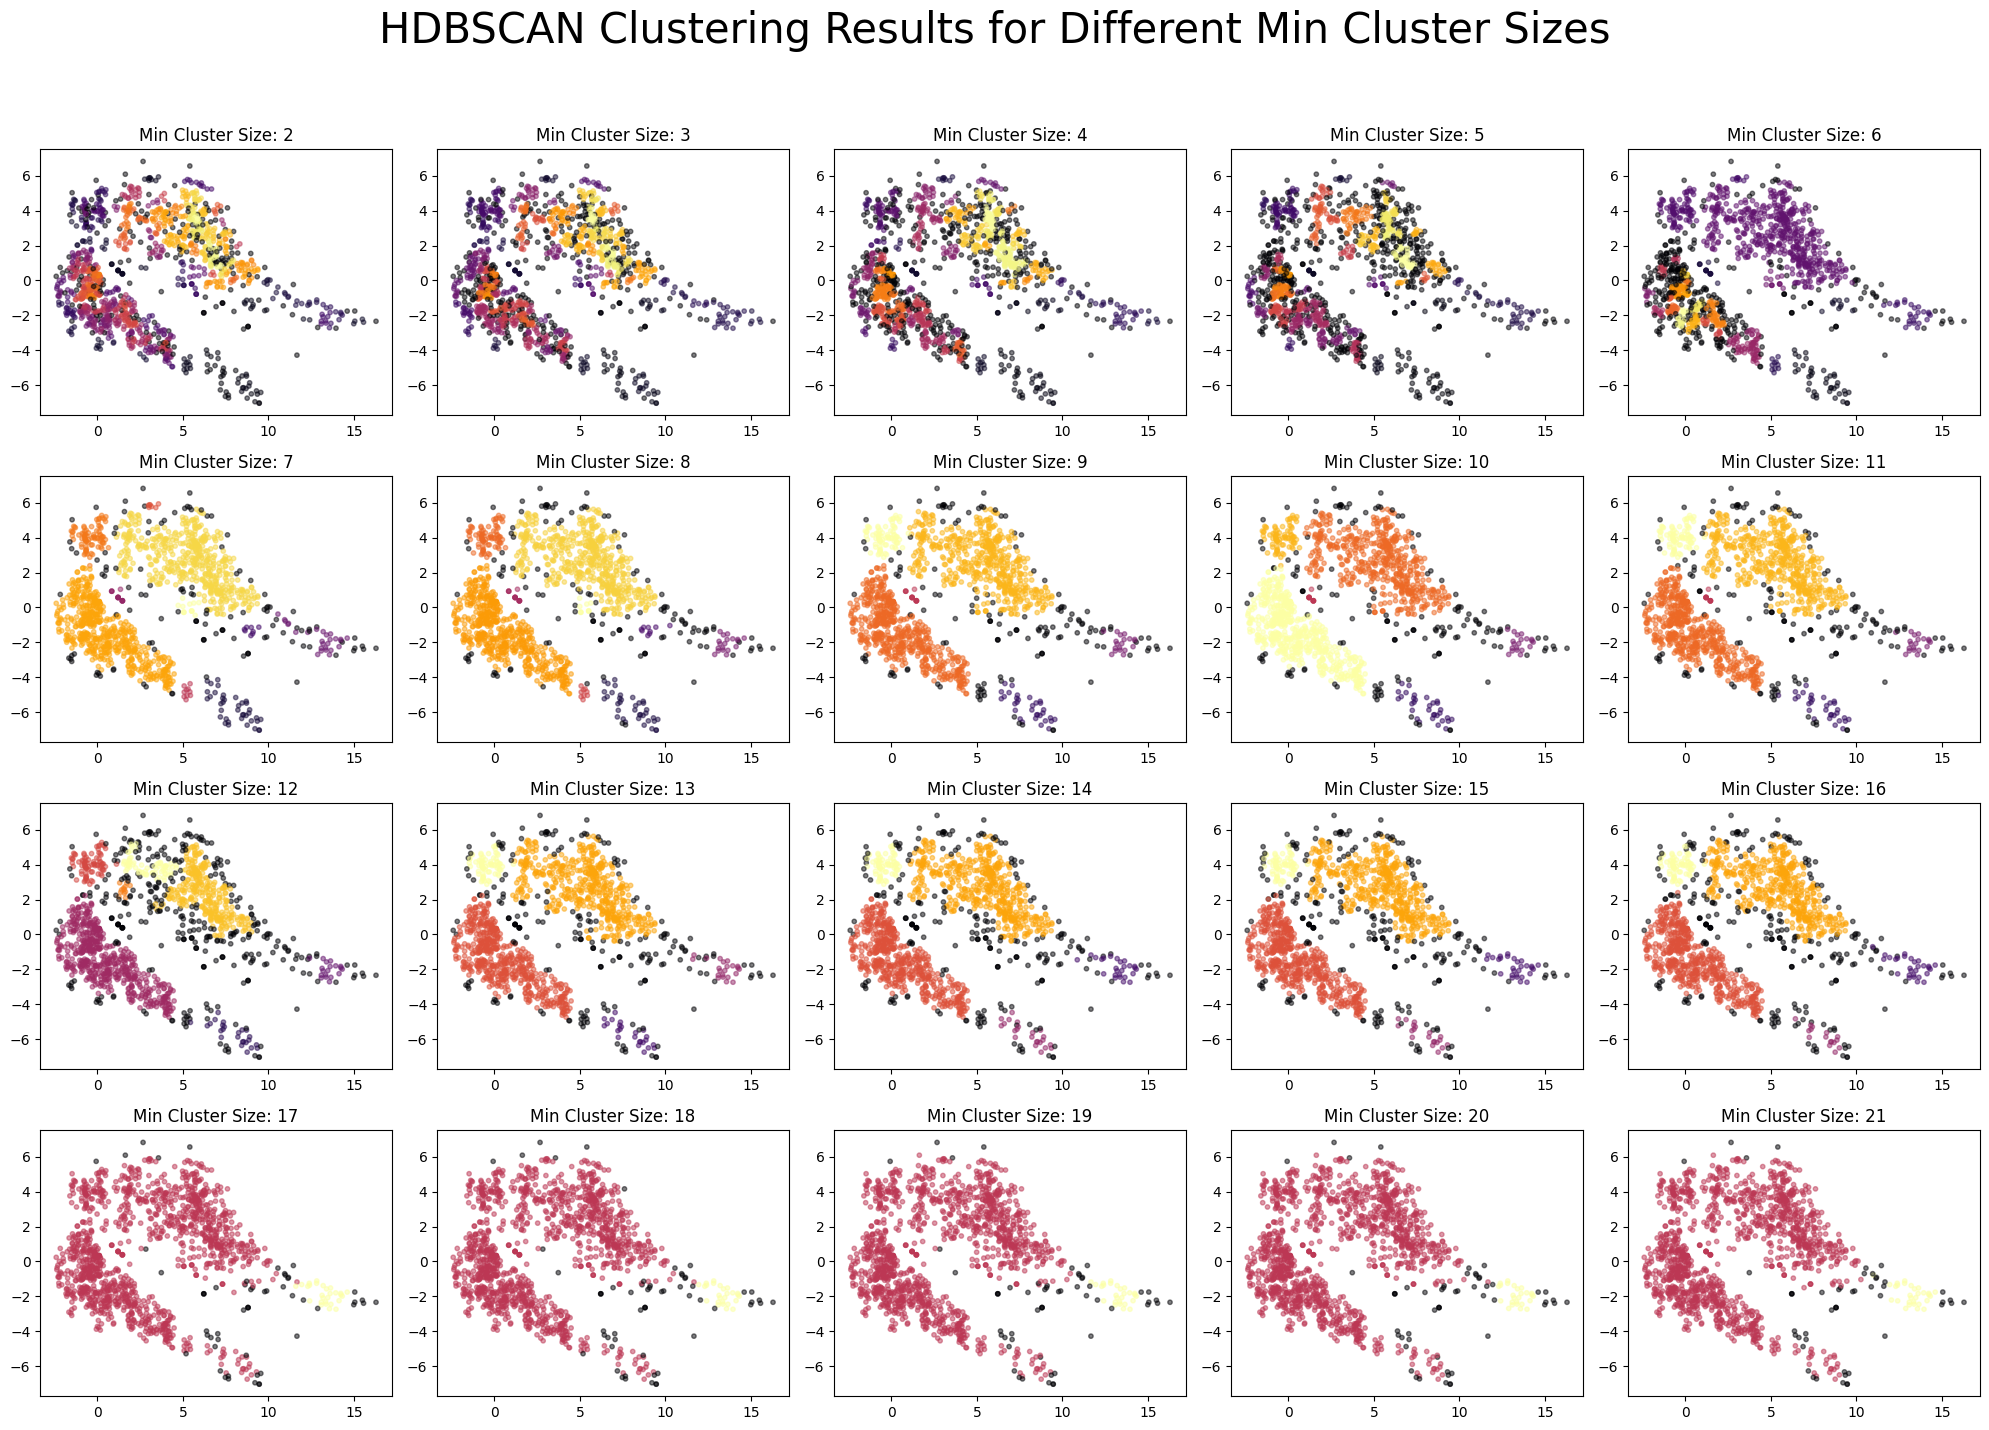

,min_cluster_size,normalized_mutual_info
7,9.0,0.580048
8,10.0,0.577719
6,8.0,0.570942
9,11.0,0.568415
11,13.0,0.564926


In [337]:
fig, axes = plt.subplots(4, 5, figsize=(20, 15))
axes = axes.flatten()  # Flatten the 2D array into a 1D list

labelling_metric_mcs = pd.DataFrame(columns=["min_cluster_size", "normalized_mutual_info"])

mcsize = np.arange(2, 22, 1)

def try_model_hdbscan_col1_col3_mcs(df, mcsize, ax):
    X, y = df.iloc[:, [2, 0]], df.iloc[:, -1]
    model = skl.cluster.HDBSCAN(min_cluster_size=mcsize)
    model.fit(X)
    labels = model.labels_

    nmi = skl.metrics.normalized_mutual_info_score(y, labels)
    labelling_metric_mcs.loc[len(labelling_metric_mcs)] = [mcsize, nmi]

    ax.scatter(X.iloc[:, 0], X.iloc[:, 1], c=labels, cmap="inferno", s=10, alpha=0.5)
    ax.set_title(f"Min Cluster Size: {mcsize}")

for i, mcs in enumerate(mcsize):
    try_model_hdbscan_col1_col3_mcs(banknote_df, int(mcs), axes[i])

plt.suptitle("HDBSCAN Clustering Results for Different Min Cluster Sizes", fontsize=30)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

labelling_metric_mcs.sort_values(by=["normalized_mutual_info"], ascending=False).head()

20


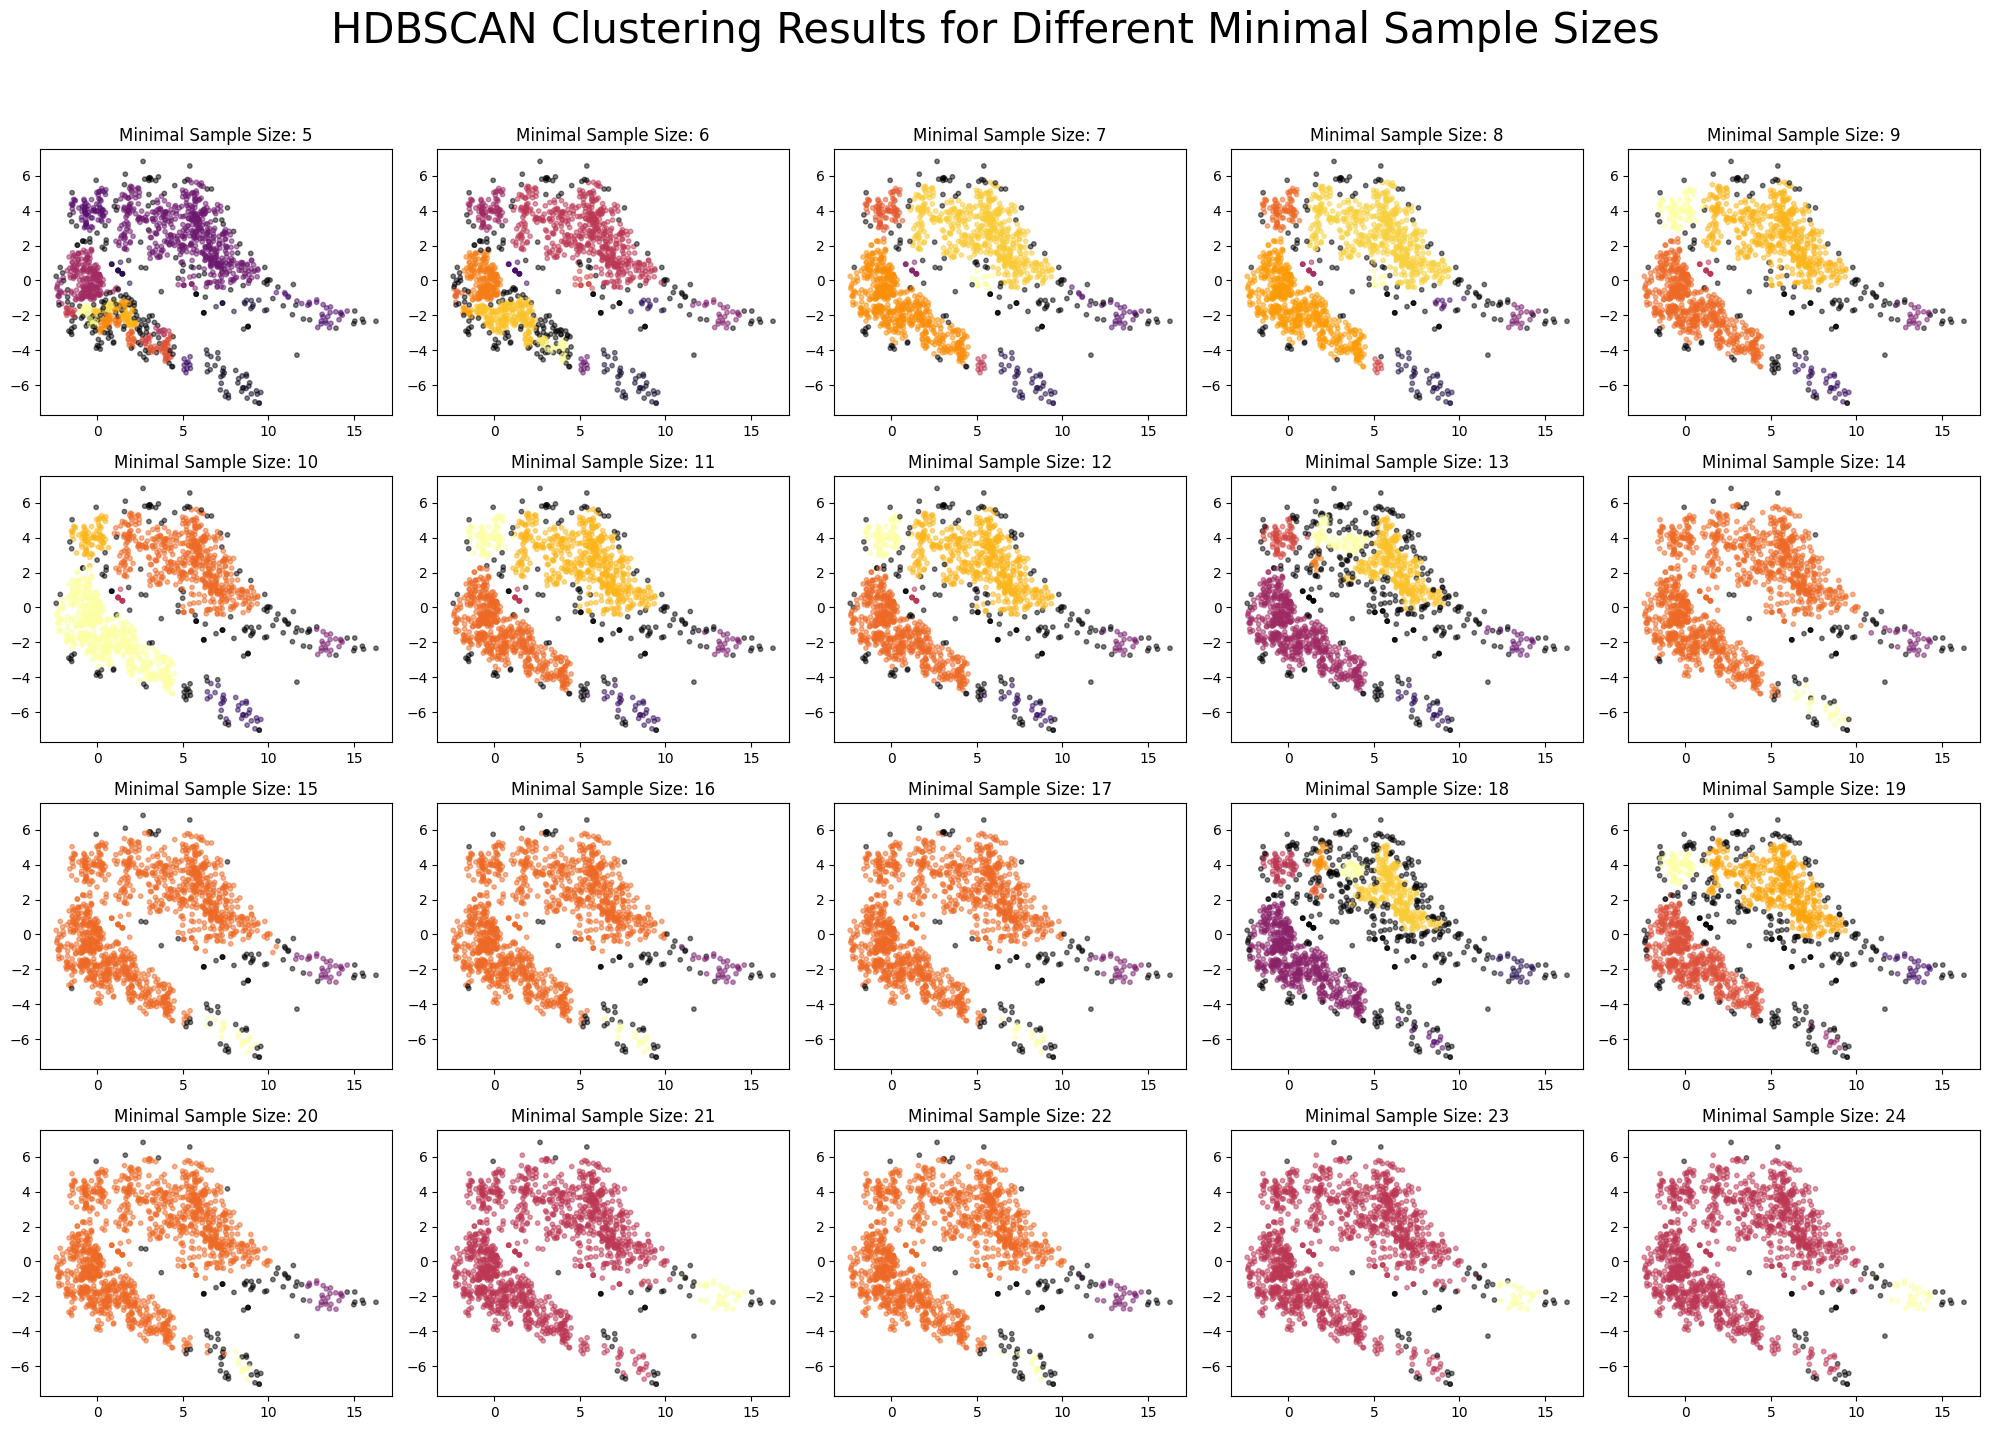

,min_samples,normalized_mutual_info
4,9.0,0.580048
5,10.0,0.577719
3,8.0,0.570942
6,11.0,0.568415
2,7.0,0.563715


In [ ]:
fig, axes = plt.subplots(4, 5, figsize=(20, 15))
axes = axes.flatten() 
min_sample_size = np.arange(5, 25, 1)
print(len(min_sample_size))

labelling_metric_mins = pd.DataFrame(columns=["min_samples", "normalized_mutual_info"])

def try_model_hdbscan_col1_col3_minsample(df, mins, ax):
    X, y = df.iloc[:, [2, 0]], df.iloc[:, -1]
    model = skl.cluster.HDBSCAN(min_cluster_size=9, min_samples=mins)
    model.fit(X)
    labels = model.labels_

    nmi = skl.metrics.normalized_mutual_info_score(y, labels)
    labelling_metric_mins.loc[len(labelling_metric_mins)] = [mins, nmi]

    ax.scatter(X.iloc[:, 0], X.iloc[:, 1], c=labels, cmap="inferno", s=10, alpha=0.5)
    ax.set_title(f"Minimal Sample Size: {mins}")

for i, mins in enumerate(min_sample_size):
    try_model_hdbscan_col1_col3_minsample(banknote_df, int(mins), axes[i])

plt.suptitle("HDBSCAN Clustering Results for Different Minimal Sample Sizes", fontsize=30)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.show()

labelling_metric_mins.sort_values(by=["normalized_mutual_info"], ascending=False).head()


## HDBSCAN winner:
The highest performing HDBSCAN model is:
`skl.cluster.HDBSCAN(min_cluster_size = 9, min_samples = 9)`

Text(0, 0.5, 'Variance')

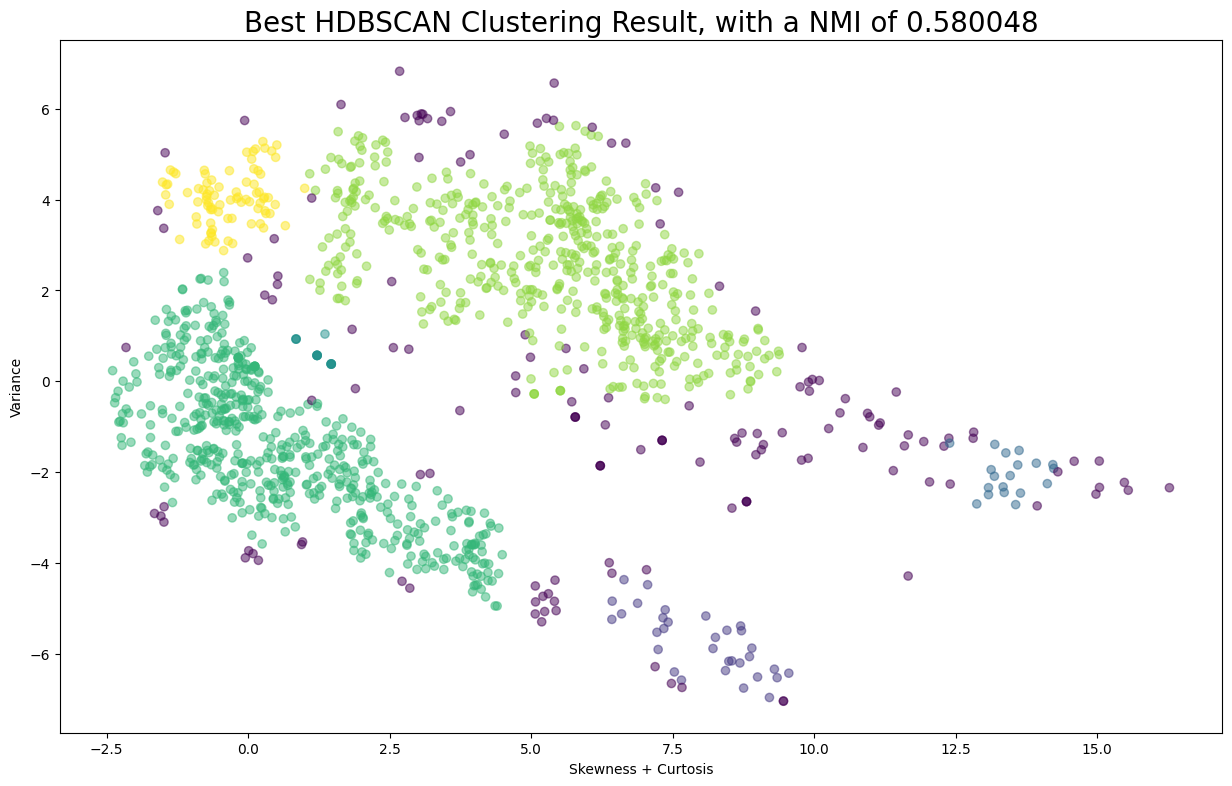

In [339]:
hdbscan_winner = skl.cluster.HDBSCAN(min_cluster_size=9, min_samples=9)
hdbscan_winner.fit(banknote_df.iloc[:, [2, 0]])
labels = hdbscan_winner.labels_

plt.figure(figsize=(15, 9))
plt.scatter(banknote_df["skew_curt_sum"], banknote_df["variance"], alpha=0.5, c=labels, cmap="viridis")
plt.title("Best HDBSCAN Clustering Result, with a NMI of 0.580048", fontsize=20)
plt.xlabel("Skewness + Curtosis")
plt.ylabel("Variance")

### Gaussian Mixture Models
Because the model's parameters are too intricate and usually not swept, I will only use a single GMM to find the metrics. Note that the graphing code are mostly made by copilot, I wasn't about to write allat

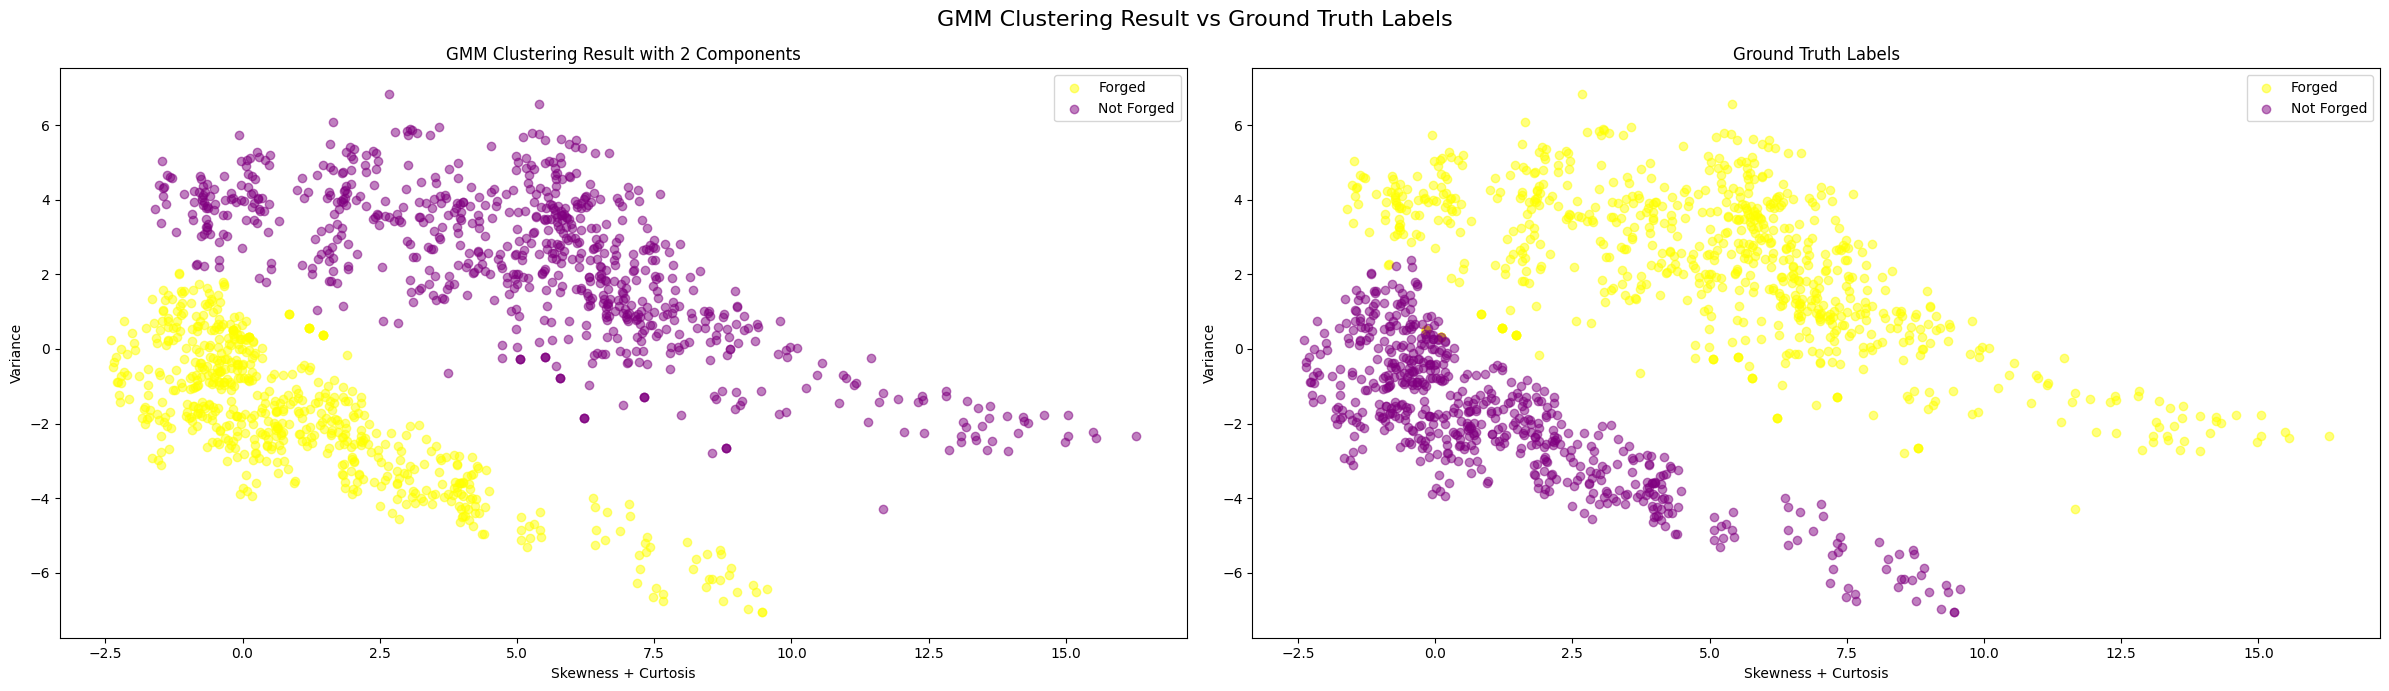

In [346]:
gmm_model = skl.mixture.GaussianMixture(n_components=2)

X, y = banknote_df.iloc[:, [2, 0]], banknote_df.iloc[:, -1]

fig, axes = plt.subplots(1, 2, figsize=(24, 7))

gmm_model.fit(X)
labels_gmm = gmm_model.predict(X)

model_metrics_gmm = pd.DataFrame(columns=["n_components", "nmi", "bic", "aic"])
model_metrics_gmm.loc[1] = [2, skl.metrics.normalized_mutual_info_score(y, labels_gmm), gmm_model.bic(X), gmm_model.aic(X)]

# GMM Clustering Result
axes[0].scatter(
    X.loc[labels_gmm == 0, X.columns[0]],
    X.loc[labels_gmm == 0, X.columns[1]],
    c='yellow', label='Forged', alpha=0.5
)

axes[0].scatter(
    X.loc[labels_gmm == 1, X.columns[0]],
    X.loc[labels_gmm == 1, X.columns[1]],
    c='purple', label='Not Forged', alpha=0.5
)

axes[0].set_title("GMM Clustering Result with 2 Components")
axes[0].set_xlabel("Skewness + Curtosis")
axes[0].set_ylabel("Variance")
axes[0].legend()

# Ground Truth Labels
axes[1].scatter(
    X.loc[banknote_df["class"] == 0, X.columns[0]],
    X.loc[banknote_df["class"] == 0, X.columns[1]],
    c='yellow', label='Forged', alpha=0.5
)

axes[1].scatter(
    X.loc[banknote_df["class"] == 1, X.columns[0]],
    X.loc[banknote_df["class"] == 1, X.columns[1]],
    c='purple', label='Not Forged', alpha=0.5
)

axes[1].set_title("Ground Truth Labels")
axes[1].set_xlabel("Skewness + Curtosis")
axes[1].set_ylabel("Variance")
axes[1].legend()

plt.suptitle("GMM Clustering Result vs Ground Truth Labels", fontsize=16)
plt.tight_layout()
plt.show()

> Looks like it's a very close match, lets check the boundaries and the metrics!

The yellow points on the graph are the forged bills, while the purple ones are not forged. Basically bills that are not forged usually have more variance and skewness+curtosis.

### Little Disclaimer for the following codeblock!
I did not make this on my own, copilot made this and I'm still trying to wrap my head around this...

c:\Users\LENOVO\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(


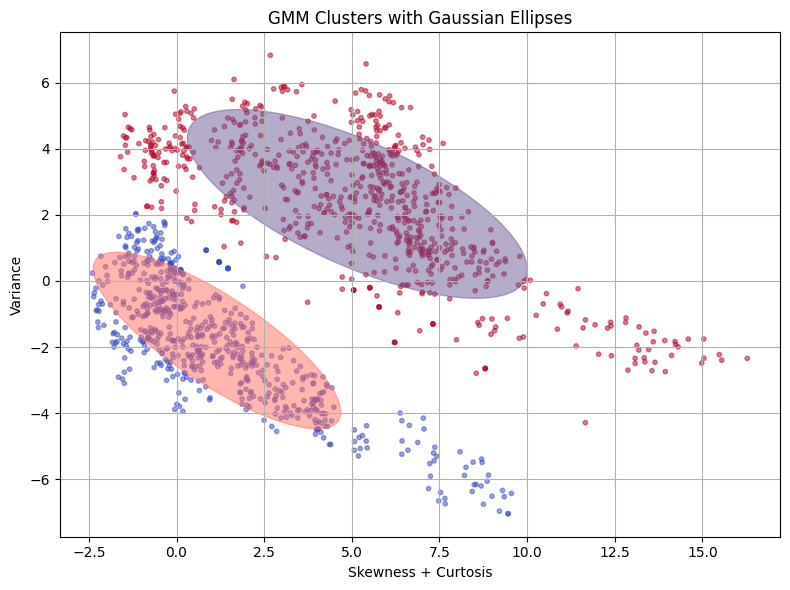

In [347]:
import matplotlib.patches as patches

def plot_gmm_ellipses(gmm, X, ax=None, colors=["#FF6F61", "#6B5B95"]):
    if ax is None:
        fig, ax = plt.subplots(figsize=(8, 6))

    ax.scatter(X[:, 0], X[:, 1], c=gmm.predict(X), cmap="coolwarm", s=10, alpha=0.5)

    for i, (mean, covar) in enumerate(zip(gmm.means_, gmm.covariances_)):
        if covar.shape == (2, 2):  # full covariance
            v, w = np.linalg.eigh(covar)
            v = 2.0 * np.sqrt(2.0) * np.sqrt(v)
            u = w[0] / np.linalg.norm(w[0])
            angle = np.arctan2(u[1], u[0])
            angle = np.degrees(angle)
            ell = patches.Ellipse(xy=mean, width=v[0], height=v[1], angle=angle, color=colors[i % len(colors)], alpha=0.5)
            ax.add_patch(ell)

    ax.set_title("GMM Clusters with Gaussian Ellipses")
    ax.set_xlabel("Skewness + Curtosis")
    ax.set_ylabel("Variance")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

plot_gmm_ellipses(gmm_model, X.values if hasattr(X, "values") else X)


In [348]:
model_metrics_gmm.head()

,n_components,nmi,bic,aic
1,2.0,0.869218,13353.534516,13296.070243


In [349]:
comparison = {
    "predicted_labels": labels_gmm,              
    "ground_truth_labels": y
}

pd.DataFrame(comparison).describe()

,predicted_labels,ground_truth_labels
count,1372.000000,1372.000000
mean,0.540087,0.444606
std,0.498572,0.497103
min,0.000000,0.000000
25%,0.000000,0.000000
50%,1.000000,0.000000
75%,1.000000,1.000000
max,1.000000,1.000000


## 🏆 GMM is the Overall Winner!

With the parameters of `n_components = 2` and `covariance_type = "full"`, **Gaussian Mixture Models (GMM)** achieved the highest clustering performance with an **NMI of 0.8692**.

This result indicates a strong alignment between the model’s predicted clusters and the true class labels, outperforming HDBSCAN on this feature space.

### 🔍 Why GMM Worked Well
- Captures elliptical and overlapping cluster shapes
- Provides soft probabilistic assignments
- Adapted well to the engineered feature space (`skew_curt_sum`, `variance`)

----

I probably won't do any more models, I think the metrics are good enough.